# Beispiel Auswertung
### Daten: Gruppe von Dominik B

### Seminar 

In [41]:
import pandas as pd    # module to work with data in DataFrames.
import numpy as np
import seaborn as sns  # module to plot DataFrames in an easy way
import matplotlib.pyplot as plt

In [42]:
# seaborn comes with default presets (called 'contents') for figure's aesthetics, 
# such as the font size, figure size etc. 
sns.set_context('talk') # try: 'talk', 'poster', 'notebook'

In [43]:
def add_name_and_response(df, name):
    image_name = df['image'].str.split("_", n = 1, expand = True)[0]
    df['observer'] = name
    df.insert(4, 'response_i', df['response'])
    df.insert(2, 'name', image_name)
    df.loc[df['response'] == 1, 'response_i'] = 0
    df.loc[df['response'] == 2, 'response_i'] = 25
    df.loc[df['response'] == 3, 'response_i'] = 50
    df.loc[df['response'] == 4, 'response_i'] = 75
    df.loc[df['response'] == 5, 'response_i'] = 100
    return df
    
    

In [44]:
# we read the data
chris = pd.read_csv('single_results/chris_single_result_1.csv')
clemens = pd.read_csv('single_results/clemens_single_result_1.csv')
daniel = pd.read_csv('single_results/daniel_single_result_2.csv')
jenny = pd.read_csv('single_results/jenny_single_result_1.csv')
katja = pd.read_csv('single_results/katja_single_result_1.csv')
laurenz = pd.read_csv('single_results/laurenz_single_result_1.csv')
paul = pd.read_csv('single_results/paul_single_result_1.csv')
dominik = pd.read_csv('single_results/dominik_single_result_1.csv')

df1 = add_name_and_response(chris, 'Chris')
df2 = add_name_and_response(clemens, 'Clemens')
df3 = add_name_and_response(daniel, 'Daniel')
df4 = add_name_and_response(jenny, 'Jenny')
df5 = add_name_and_response(katja, 'Katja')
df6 = add_name_and_response(laurenz, 'Laurenz')
df7 = add_name_and_response(paul, 'Paul')
df8 = add_name_and_response(dominik, 'Dominik')


df = pd.concat((df1, df2, df3, df4, df5, df6, df7, df8))



# if we have more observers we could read their files, assign the column observer 
# with their name, and concatenate the DataFrames with pd.concat(). Example:
# df1 = pd.read_csv('Person1.csv')
# df1['observer'] = 'Person1'      # creates a new column called 'observer'
# df2 = pd.read_csv('Person2.csv') # reads second file
# df2['observer'] = 'Person2'     
# df = pd.concat((df, df2))        # concatenates both dataframes in one


In [45]:
# explore the first entries in your data
df.head()

,usage,image,name,filter,intensity,response_i,response,resptime,observer
0,no,Lake_Lark_75.jpg,Lake,Lark,75,50,3,12.605726,Chris
1,no,Girl1_Juno_0.jpg,Girl1,Juno,0,25,2,3.134608,Chris
2,no,Girl2_Juno_25.jpg,Girl2,Juno,25,25,2,2.174805,Chris
3,no,Girl1_Juno_75.jpg,Girl1,Juno,75,75,4,1.158855,Chris
4,no,Lake_Juno_0.jpg,Lake,Juno,0,0,1,2.104012,Chris


In [46]:
# sanity checks: how many groups do you expect per categorical variable?
# in these data we expect :
# 4 different image-name values
print(df['name'].unique())

['Lake' 'Girl1' 'Girl2' 'Temple']


In [47]:
# 3 different filter values
observer = np.asarray(df['observer'].unique())

print(observer)

['Chris' 'Clemens' 'Daniel' 'Jenny' 'Katja' 'Laurenz' 'Paul' 'Dominik']


In [48]:
# 5 different answers
print(df['response_i'].unique())

[ 50  25  75   0 100]


In [49]:
# there are 8 observers, 4 intensities, so we expect 8x4=32 

agg1 = df.groupby(['filter', 'intensity']).count()

print(agg1)
print(len(agg1))

                     usage  image  name  response_i  response  resptime  \
filter    intensity                                                       
Clarendon 0             32     32    32          32        32        32   
          25            32     32    32          32        32        32   
          50            32     32    32          32        32        32   
          75            32     32    32          32        32        32   
          100           32     32    32          32        32        32   
Juno      0             32     32    32          32        32        32   
          25            32     32    32          32        32        32   
          50            32     32    32          32        32        32   
          75            32     32    32          32        32        32   
          100           32     32    32          32        32        32   
Lark      0             32     32    32          32        32        32   
          25            3

In [50]:
# and 24 x 15 pictures = 360  different types of trials
agg2 = df.groupby(['filter', 'intensity', 'image']).count()
print(len(agg2))

60


In [51]:
# each of them with one entry
print(agg2)

                                              usage  name  response_i  \
filter    intensity image                                               
Clarendon 0         Girl1_Clarendon_0.jpg         8     8           8   
                    Girl2_Clarendon_0.jpg         8     8           8   
                    Lake_Clarendon_0.jpg          8     8           8   
                    Temple_Clarendon_0.jpg        8     8           8   
          25        Girl1_Clarendon_25.jpg        8     8           8   
                    Girl2_Clarendon_25.jpg        8     8           8   
                    Lake_Clarendon_25.jpg         8     8           8   
                    Temple_Clarendon_25.jpg       8     8           8   
          50        Girl1_Clarendon_50.jpg        8     8           8   
                    Girl2_Clarendon_50.jpg        8     8           8   
                    Lake_Clarendon_50.jpg         8     8           8   
                    Temple_Clarendon_50.jpg       8

## Visualizing data from about one image category


<ipython-input-52-636ff16bd5b5>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(X)


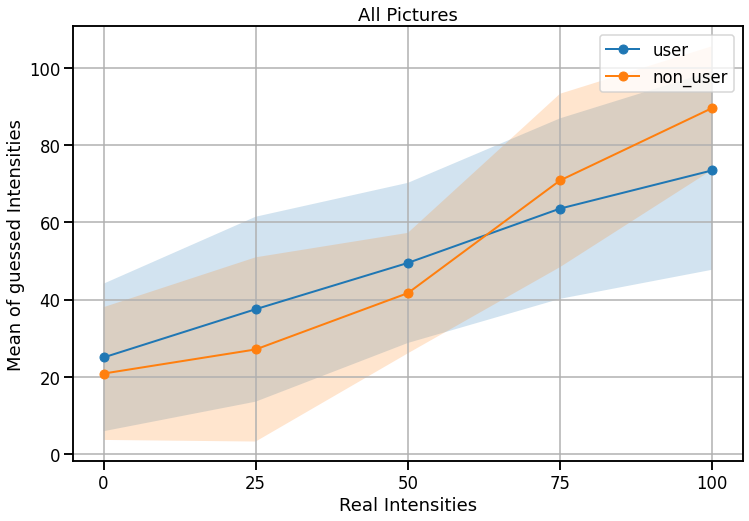

In [52]:
# selecting data for only one picture
picname = 'Girl1'
#d = df[df['name'] == picname]
d = df
#d = d[d['intensity'] == d['response_i']]

user = d.loc[d['usage'] == 'yes']
non_users = d.loc[d['usage'] == 'no']
means_u, std_u = compute_means_and_std(user, observer)
means_n, std_n = compute_means_and_std(non_user, observer)


# plotting
X = ['0', '25', '50', '75', '100']
x = np.arange(len(X))
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(X, means_u, lw=2, label='user', linestyle='-', marker='o')
ax.plot(X, means_n, lw=2, label='non_user',  linestyle='-', marker='o')

ax.fill_between(X, means_u+std_u, means_u-std_u,  alpha=0.2)
ax.fill_between(X, means_n+std_n, means_n-std_n, alpha=0.2)

ax.set_title('All Pictures')
#ax.set_yticklabels()
ax.set_xticklabels(X)
ax.legend(loc='upper right')
ax.set_xlabel('Real Intensities')
ax.set_ylabel('Mean of guessed Intensities')
ax.grid()


In [53]:
print(len(d))

480


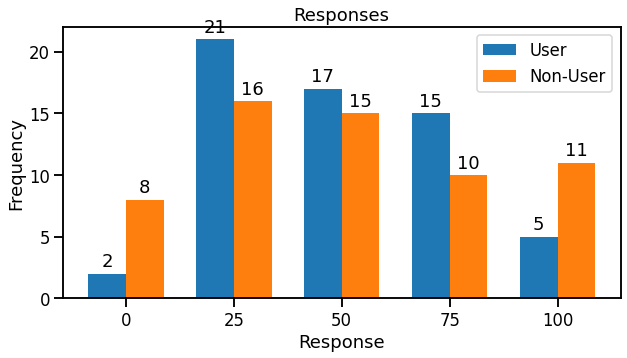

In [54]:
picname = 'Girl1'
d= df[df['name'] == picname]


user = d.loc[d['usage'] == 'yes']
non_user = d.loc[d['usage'] == 'no']

(unique, user_counts) = np.unique(user['response_i'], return_counts=True)
(unique, non_user_counts) = np.unique(non_user['response_i'], return_counts=True)

labels = ['0', '25', '50', '75', '100']
x = np.arange(len(labels))
width=0.35

fig, ax = plt.subplots(figsize=(10,5))
p1 = ax.bar(x - width/2, user_counts, width=width, label='User')
p2 = ax.bar(x + width/2, non_user_counts, width=width, label='Non-User')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.bar_label(p1, padding=3)
ax.bar_label(p2, padding=3)
ax.set_xlabel('Response')
ax.set_ylabel('Frequency')

plt.title('Responses')

plt.legend();

In [19]:
def compute_means_and_std(d_frame, observers):
    user = d_frame
    user_count = {'0': [], '25': [], '50': [], '75': [], '100': []}

    for intens in range(0,101,25):
        u_name = user.loc[user['intensity'] == intens]
        (unique, user_counts) = np.unique(u_name['response_i'], return_counts=True)
        
        #for intens, count in zip(unique, user_counts):
        user_count[str(intens)].append(u_name['response_i'].tolist())
        
            

    user_means, user_std = [], []

    keys = ['0', '25', '50', '75', '100']
    
    for key in keys:
        user_means.append(np.mean(user_count[key]))
        user_std.append(np.std(user_count[key]))
        #user_std.append(np.var(user_count[key]))


    return np.asarray(user_means), np.asarray(user_std)

Text(0.5, 1.0, 'Girl1')

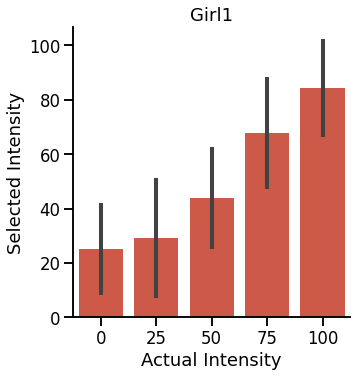

In [25]:
picname = 'Girl1'
d= df[df['name'] == picname]

### barplot aggregated by k
## we call the function catplot() (cat: categorical)
g = sns.catplot(x='intensity', y='response_i', data=d, kind='bar', color='#e34a33',
            ci='sd')
g.set_ylabels('Selected Intensity' )
g.set_xlabels('Actual Intensity')
#g.set(ylim = (-3, 3))
plt.title(picname)

In [21]:
### barplot aggregated by g
g = sns.catplot(x='g', y='quality_value', data=d, kind='bar', color='#3182bd',
            ci='sd')
g.set_ylabels('Quality')
g.set_xlabels('Gamma')
g.set(ylim = (-3, 3))
plt.title(picname)

ValueError: Could not interpret input 'g'

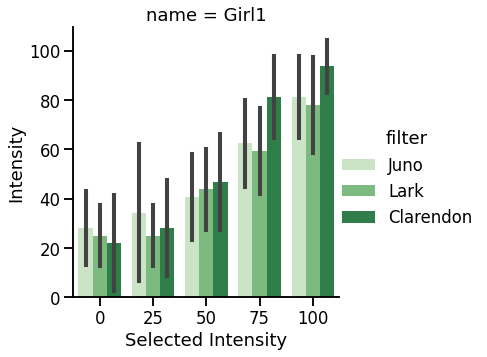

In [22]:
#### barplot aggregated by k and g
g = sns.catplot(x='intensity', y='response_i', data=d, hue='filter',
                col='name', kind='bar', ci='sd',
                palette='Greens')
g.set_ylabels('Intensity')
g.set_xlabels('Selected Intensity')
#g.set(ylim = (-3, 3))
#g.savefig('%s.pdf' % picname)

In [23]:
user = d.loc[d['usage']== 'yes']
non_user = d.loc[d['usage']=='no']

for inten in 'intensity': 
    np.mean()
    

TypeError: _mean_dispatcher() missing 1 required positional argument: 'a'

In [17]:
# a line plot instead of a barplot... for that we call the function relplot() (rel: relationship)
g = sns.relplot(x='k', y='quality_value', data=d, hue='g',
                col='picture', kind='line', ci='sd',
                palette='Greens')
g.set_ylabels('Quality')
g.set_xlabels('Kontrast')
g.set(ylim = (-3, 3))
#g.savefig('%s.pdf' % picname)

ValueError: Could not interpret value `k` for parameter `x`

## Visualizing data from all pictures

KeyError: 'name'

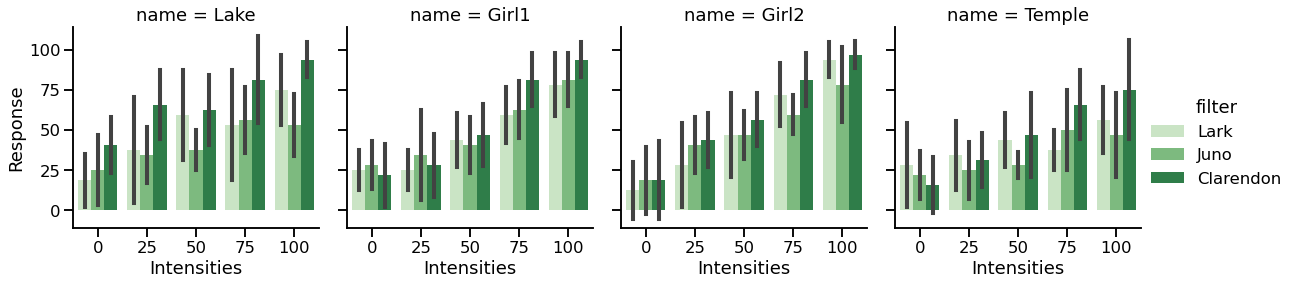

In [20]:
# %%  Using small multiples to visualize data from all pictures in one figure 
g = sns.catplot(x='intensity', y='response_i', data=df, hue='filter', col='name',
             kind='bar', ci='sd', height=4,
                palette='Greens')
g.set_ylabels('Response')
g.set_xlabels('Intensities')
g.set_titles('{name}')
g.set(ylim = (0, 100))
g.set(xlim = (0, 25, 50, 75, 100))
# g.savefig('allpictures_in_different_panels.pdf')


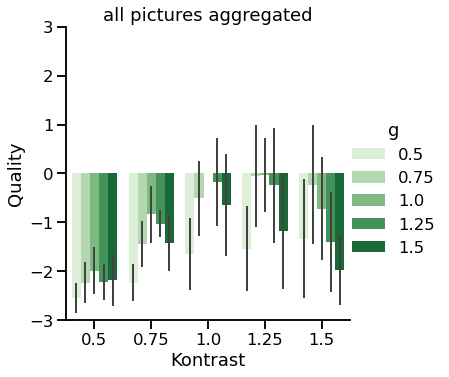

In [20]:
# %% collapsing all pictures into one visualization
g = sns.catplot(x='k', y='quality_value', data=df, hue='g',
                kind='bar', ci='sd', errwidth=2,
                palette='Greens')
g.set_ylabels('Quality')
g.set_xlabels('Kontrast')
g.set(ylim = (-3, 3))
plt.title('all pictures aggregated')
g.savefig('allpictures_aggregated.pdf')



## Some statistical analysis

In [21]:
# we load scipy
import scipy

### t-test 
With a t-test we can test whether the values of two groups have the same mean. The null-hypothesis states that the mean difference between the two samples is zero. 
The test gives us a 'p-value', the conditional probability for the observed difference between means under the assumption (condition) that the null-hypothesis is true. When the p-value is smaller than a criterion value (0.05 for 95 % confidence by convention), we say we *reject* the null-hypothesis. In other words, a p value <.05 indicates that the difference between the two samples is unlikely to be truly zero.

In [22]:
# we select the data we want to compare. We select the data for k=0.5 and k=1.5 
# and assign them to two vectors, y1 and y2
k1 = df[df['k']==0.5]
k2 = df[df['k']==1.0]

k1
#k1['quality_value']


,k,g,picture,brightness,quality_value
7,0.5,0.75,Detailarm,195.980923,-2.45
11,0.5,1.50,DunkelRaum,84.542856,-1.05
12,0.5,0.75,Einfarbig,214.433419,-2.16
22,0.5,1.25,DunkelStadt,57.461933,-2.80
25,0.5,0.75,Abstrakt,37.192704,-1.21
...,...,...,...,...,...
331,0.5,1.00,HellFace,207.936104,-2.70
333,0.5,1.00,Kontrastreich,128.555497,-2.06
334,0.5,1.25,HellRaum,181.237005,-2.13
357,0.5,0.75,HellStrand,174.530515,-2.22


In [23]:
# we call a t-test for two independent samples 
tstat, pvalue = scipy.stats.ttest_ind(k1['quality_value'], 
                                      k2['quality_value']) 

print('p-value:', pvalue)

p-value: 2.606247110907521e-21


The p-value is << 0.05, so we reject the null hypothesis and say that the difference is significant.

### ANOVA
If we want to compare the means of more than 2 groups, we need to perform an Analysis of Variance (ANOVA). The null-hypothesis in the ANOVA states that there is no difference between the means of the groups. A p-value less than 0.05 (at 95 %) rejects this general hypothesis without indicating which groups are different from one another.

In [24]:
# for an ANOVA we need the python module statsmodels (statistical models)
import statsmodels.api as sm  

# the particular function we need is called ols()
# (ols: ordinary least squares, that is the type of fitting)
from statsmodels.formula.api import ols   

In [25]:
# we need to set up a 'formula' for the model. This formula is similar to the syntax in R.

# on the left side of the tilde we put the dependent variable
# on the right side of the tilde we state the independent variables 
# the C( )  indicates that we consider the variable as a categorical variable (and not continuous)
# the sign + is not a sum, it is to indicate more than one variable.
# the sign * is not a multiplication, it is to indicate we want to also model interactions between the variables

# we call ols() passing the model 'formula'
mod = ols('quality_value ~ C(k) + C(g)', data=df)

# we fit the model
fit = mod.fit()

# we show the ANOVA table
sm.stats.anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
C(k),4.0,121.098479,30.274620,40.554424,6.241619e-28
C(g),4.0,59.353084,14.838271,19.876634,9.159041e-15
Residual,351.0,262.027924,0.746518,NaN,NaN


The ANOVA table shows that for both variables k and g there is a signifficant effect (p-values < 0.05 for 95 % confidence). There is also a signifficant interaction term ('C(k):C(g)').


The p-values reject the null hypothesis, meaning that there is a significant difference between the means. But which ones? To answer that we need to perform a so-called post-hoc test. 

Post-hoc tests do all the pairwise comparisons (like a t-test), but correcting the p-value for multiple comparisons. This correction is needed because of statistical reasons. The risk of not correcting is that we will be detecting differences that are not there. (https://en.wikipedia.org/wiki/Multiple_comparisons_problem).

In [26]:
# perform multiple pairwise comparison
from statsmodels.stats.multicomp import MultiComparison

MultiComp = MultiComparison(df['quality_value'],
                             df['k'])

# the first argument is the test we will do, a t-test (same function as above)
# the second argument is the type of correction, in this case Bonferroni correction.
comp = MultiComp.allpairtest(scipy.stats.ttest_ind, method='bonf')
comp[0]


group1,group2,stat,pval,pval_corr,reject
0.5,0.75,-9.0713,0.0,0.0,True
0.5,1.0,-11.355,0.0,0.0,True
0.5,1.25,-11.0697,0.0,0.0,True
0.5,1.5,-7.3893,0.0,0.0,True
0.75,1.0,-4.4619,0.0,0.0002,True
0.75,1.25,-4.9838,0.0,0.0,True
0.75,1.5,-1.6373,0.1037,1.0,False
1.0,1.25,-0.6897,0.4916,1.0,False
1.0,1.5,1.9879,0.0489,0.4888,False
1.25,1.5,2.6678,0.0085,0.0849,False


The table shows all comparisons for k. The rightmost column says whether there is a significant difference between the groups tested (reject = True).